In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Confidence Intervals Using the Normal Distribution

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

1. Load "tips" dataset from Seaborn library

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

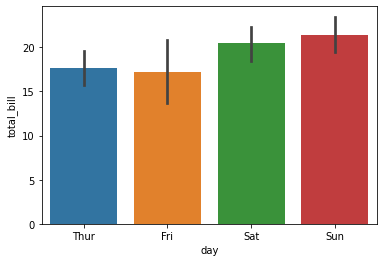

In [5]:
sns.barplot(x="day", y="total_bill", data=tips, ci=95);

# python bir datasetinden observation aldığında bunu sample varsayar
# buradaki bar lardaki siyah çizgiler confidence interval.

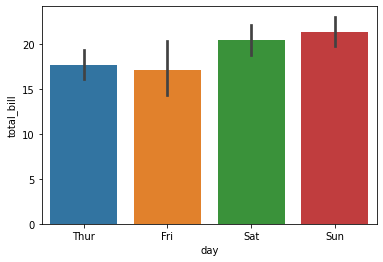

In [8]:
sns.barplot(x="day", y="total_bill", data=tips, ci=90);

# python bir datasetinden observation aldığında bunu sample varsayar
# buradaki bar lardaki siyah çizgiler confidence interval.

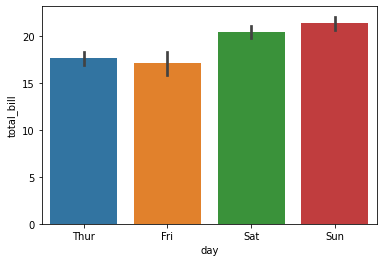

In [9]:
sns.barplot(x="day", y="total_bill", data=tips, ci=50);

# python bir datasetinden observation aldığında bunu sample varsayar
# buradaki bar lardaki siyah çizgiler confidence interval.

3. Subset a dataframe just including Sunday tips

In [10]:
tipsSun = tips[tips['day'] == "Sun"]

In [11]:
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


4. Calculate mean and std

In [47]:
tipsSun["total_bill"].mean()

# pazar günü ortalama fatura miktarı 21.41

21.410000000000004

In [49]:
tipsSun["total_bill"].std()

#  pazar günkü faturaların standart sapması 8.83

8.832121828869889

In [50]:
sigma = tipsSun["total_bill"].std()
sigma

8.832121828869889

In [51]:
tipsSun.shape

(76, 7)

In [52]:
tipsSun.shape[0]

76

In [53]:
len(tipsSun)

76

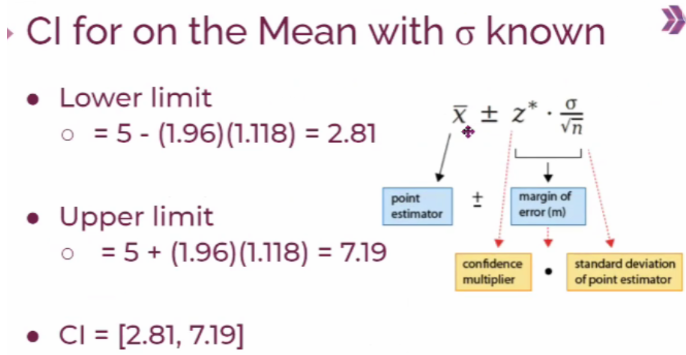

5. Calculate standart error of the mean

In [54]:
# Bulduğumuz ortalamanın (21.41) bir güven aralığı var.
# Bunu barplotta da görüyoruz. Güven aralığını 95% olarak belirledik(default).

# Bu ortalama istatistiğinin bir standart hatası var.
# Sigma / kök(n) ( σ / √n )
# n, data frame deki observation sayısı. Bunu len() fonksiyonu ile bulabiliriz. Veya shape[0] da n i bize verir.

In [55]:
sem = tipsSun["total_bill"].std() / np.sqrt(tipsSun.shape[0])

In [56]:
sem

# (sem) standart error of the mean ( σ / √n )
# Ortalama (mean) istatistiğime ilişkin standart hata

1.0131138555021968

6. Calculate the margin of error (95%)

In [57]:
moe = 1.96 * sem

# (moe) margin of error  = Confidence multiplier (z*) * standart error of the mean (sem)  -- >    
# moe = z* . σ / √n

In [58]:
moe

# 1.98  hata marjımız.
# Yani istatistiğimize hata marjını eklediğimizde upper confidence limiti, çıkardığımızda lower confidence limiti bulacağız.

1.9857031567843058

7. Calculate the upper confidence limit

In [59]:
upper_lim=tipsSun["total_bill"].mean() + moe
upper_lim

23.39570315678431

8. Calculate the lower confidence limit

In [60]:
low_lim=tipsSun["total_bill"].mean() - moe
low_lim

19.424296843215696

In [61]:
#help(stats.norm.interval)

9. Calculate 95% Confidence Interval around the mean by using scipy.stats. 

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

In [62]:
# from scipy import stats

stats.norm.interval(0.95, loc = tipsSun["total_bill"].mean(), scale = sem)


# .interval() metodu kullanıyoruz. bu metod ile confidence interval ı buluyoruz.

# interval(alpha, loc=0, scale=1) 
# normalde alpha : significance level (1-ci)dir. python da alpha yerine direkt ci yi koyuyoruz. oradan kendisi alphayı buluyor.
# loc : ortalama (mean)
# scale : standart error of the mean (ortalamaya ilişkin standart hata) 

(19.42433333097718, 23.395666669022827)

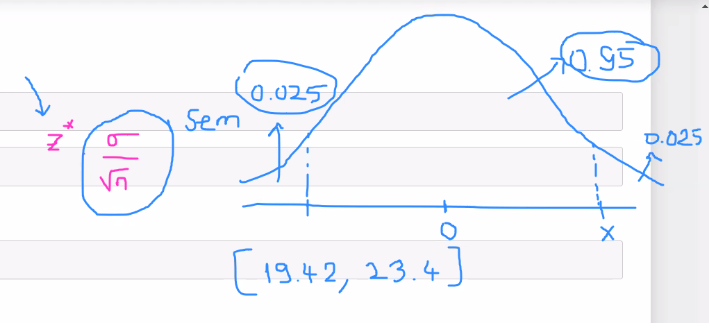

In [ ]:
# tipsSun datasetimdeki total_bill'in average'ı üzeride oluşturduğumuz 95 % güven aralığımı (Ci) 19.42 - 23.4 olarak bulduk.

# Bu şu demek: 

# ELİMİZDE SAMPLE'LAR VAR VE SAMPLE'DAN POPÜLASYONA GİTMEYE ÇALIŞIYORUZ. 

# TÜM PAZAR GÜNLERİNDEKİ ORTALAMA total_bill'i TAHMİN ETMEYE ÇALIŞIYORUZ.

# Bir interval, bir aralık tahmini yapıyoruZ. Ne üzerinden? Bir nokta tahmini üzerinden, x bar (sample'ın mean'i) üzerinden. 

# Onun etrafında +/- margin of errorlar (hata marjları) var. 

# Hata marjını bulurken z* devreye giriyor (confidence multiplier). 

# Onu da tablodan buluyoruz. ci = 95% olduğu için tabloda karşılık gelen z* değerini alıyoruz.

# 95% demek alfa'nın (1-0.95) = 5% olması demek. 

# Bu her iki tarafta alfa/2 kadarlık yani 2.5% lik bir alan demek. 

# İşte z* değerinden sonraki alan bu 2.5% lik alan oluyor ve z*'yı formülde yerine koyunca moe'ya ulaşıyoruz.

# Ve mean +/- moe formülünden güven aralığını buluyoruz.

# "Popülasyonun ortalaması yüzde 95 güvenirlikte bu aralıktadır" diyoruz. 

# Yani popülasyona ilişkin güven aralığı 19.42-23.4 tür. 

# Sonuç olarak: TÜM PAZAR GÜNLERİNDEKİ FATURALARIN ORTALAMASI YÜZDE 95 GÜVENİLİRLİKLE 19.42-23.4 ARASINDADIR. 

In [63]:
stats.norm.interval(alpha=0.90, loc=tipsSun["total_bill"].mean(), scale=sem)

(19.743576000262426, 23.07642399973758)

In [64]:
stats.norm.interval(alpha=0.70, loc=tipsSun["total_bill"].mean(), scale=sem)

(20.35997497279874, 22.46002502720127)

In [65]:
stats.norm.interval(alpha=0.99, loc=tipsSun["total_bill"].mean(), scale=sem)

(18.800391643166037, 24.01960835683397)

In [ ]:
# Güven aralığını küçültürsek, aralık da azalacaktır.

# Çünkü bu, ortalama değeri daha düşük bir olasılıkla tahmin etmemiz anlamına geliyor.

# Mean'in içinde bulunduğu aralığı geniş tutarsak doğru tahmin etme olasılığımız artacak, 

# Aralık dar olursa doğru tahmin etme olasılığımız azalacaktır.

### Exercise 8.7 (Large Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

- The shopping times of n = 64 randomly selected customers at a local supermarket were recorded. 

- The average and variance of the 64 shopping times were 33 $minutes$ and 256 $minutes^2$, respectively. 

- Estimate μ, the true average shopping time per customer, with a confidence coefficient of 1 − α = .90.

In [26]:
n = 64
mu = 33
var = 256
ci = 0.90
s = np.sqrt(var)

sem = s/np.sqrt(64)

In [27]:
stats.norm.interval(0.90, loc = mu, scale = sem)

(29.710292746097053, 36.28970725390295)

### Exercise 8.11 (Small Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

A manufacturer of gunpowder has developed a new powder, which was tested in eight shells. The resulting muzzle velocities, in feet per second, were as follows:

3005 2925 2935 2965

2995 3005 2937 2905

Find a 95% confidence interval for the true average velocity μ for shells of this type. Assume that muzzle velocities are approximately normally distributed.

In [68]:
x = [3005, 2925, 2935, 2965, 2995, 3005, 2937, 2905]

In [69]:
# Sample size
n = len(x)

# Sample mean
mu = np.mean(x)

# Sample standard deviation
s = np.std(x, ddof=1)

# Confidence level
cl = 0.95

In [74]:
print("Sample size (n) :",n)
print("Sample mean (mu) :",mu)
print("Sample standard deviation (s) :",s)

Sample size (n) : 8
Sample mean (mu) : 2959.0
Sample standard deviation (s) : 39.08964057138413


In [75]:
s = pd.Series(x).std()
s

<IPython.core.display.Javascript object>

39.08964057138413

In [ ]:
# popülasyonun sigmasını (std) bilmiyorsanız, sample size (n) 30 dan küçükse t dağılımı kullanıyoruz.

# t-distribution normal distribution'a yakın bir görünümdedir ama ufak farklılıkları var.

# t-distribution degrees of freedom (serbestlik derecesine) göre değişir. 

In [76]:
stats.t.interval(cl, df=n-1, loc=mu, scale=s/np.sqrt(n))

(2926.3202426713874, 2991.6797573286126)